In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [2]:
# 6.1. Wczytywanie danych

root_path = "https://raw.githubusercontent.com/matzim95/ML-datasets/master/"
dataset_name = "diabetes.csv"
path_to_data = root_path + dataset_name
df_diabetes = pd.read_csv(path_to_data)

df_diabetes.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [3]:
df_diabetes.shape

(768, 9)

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


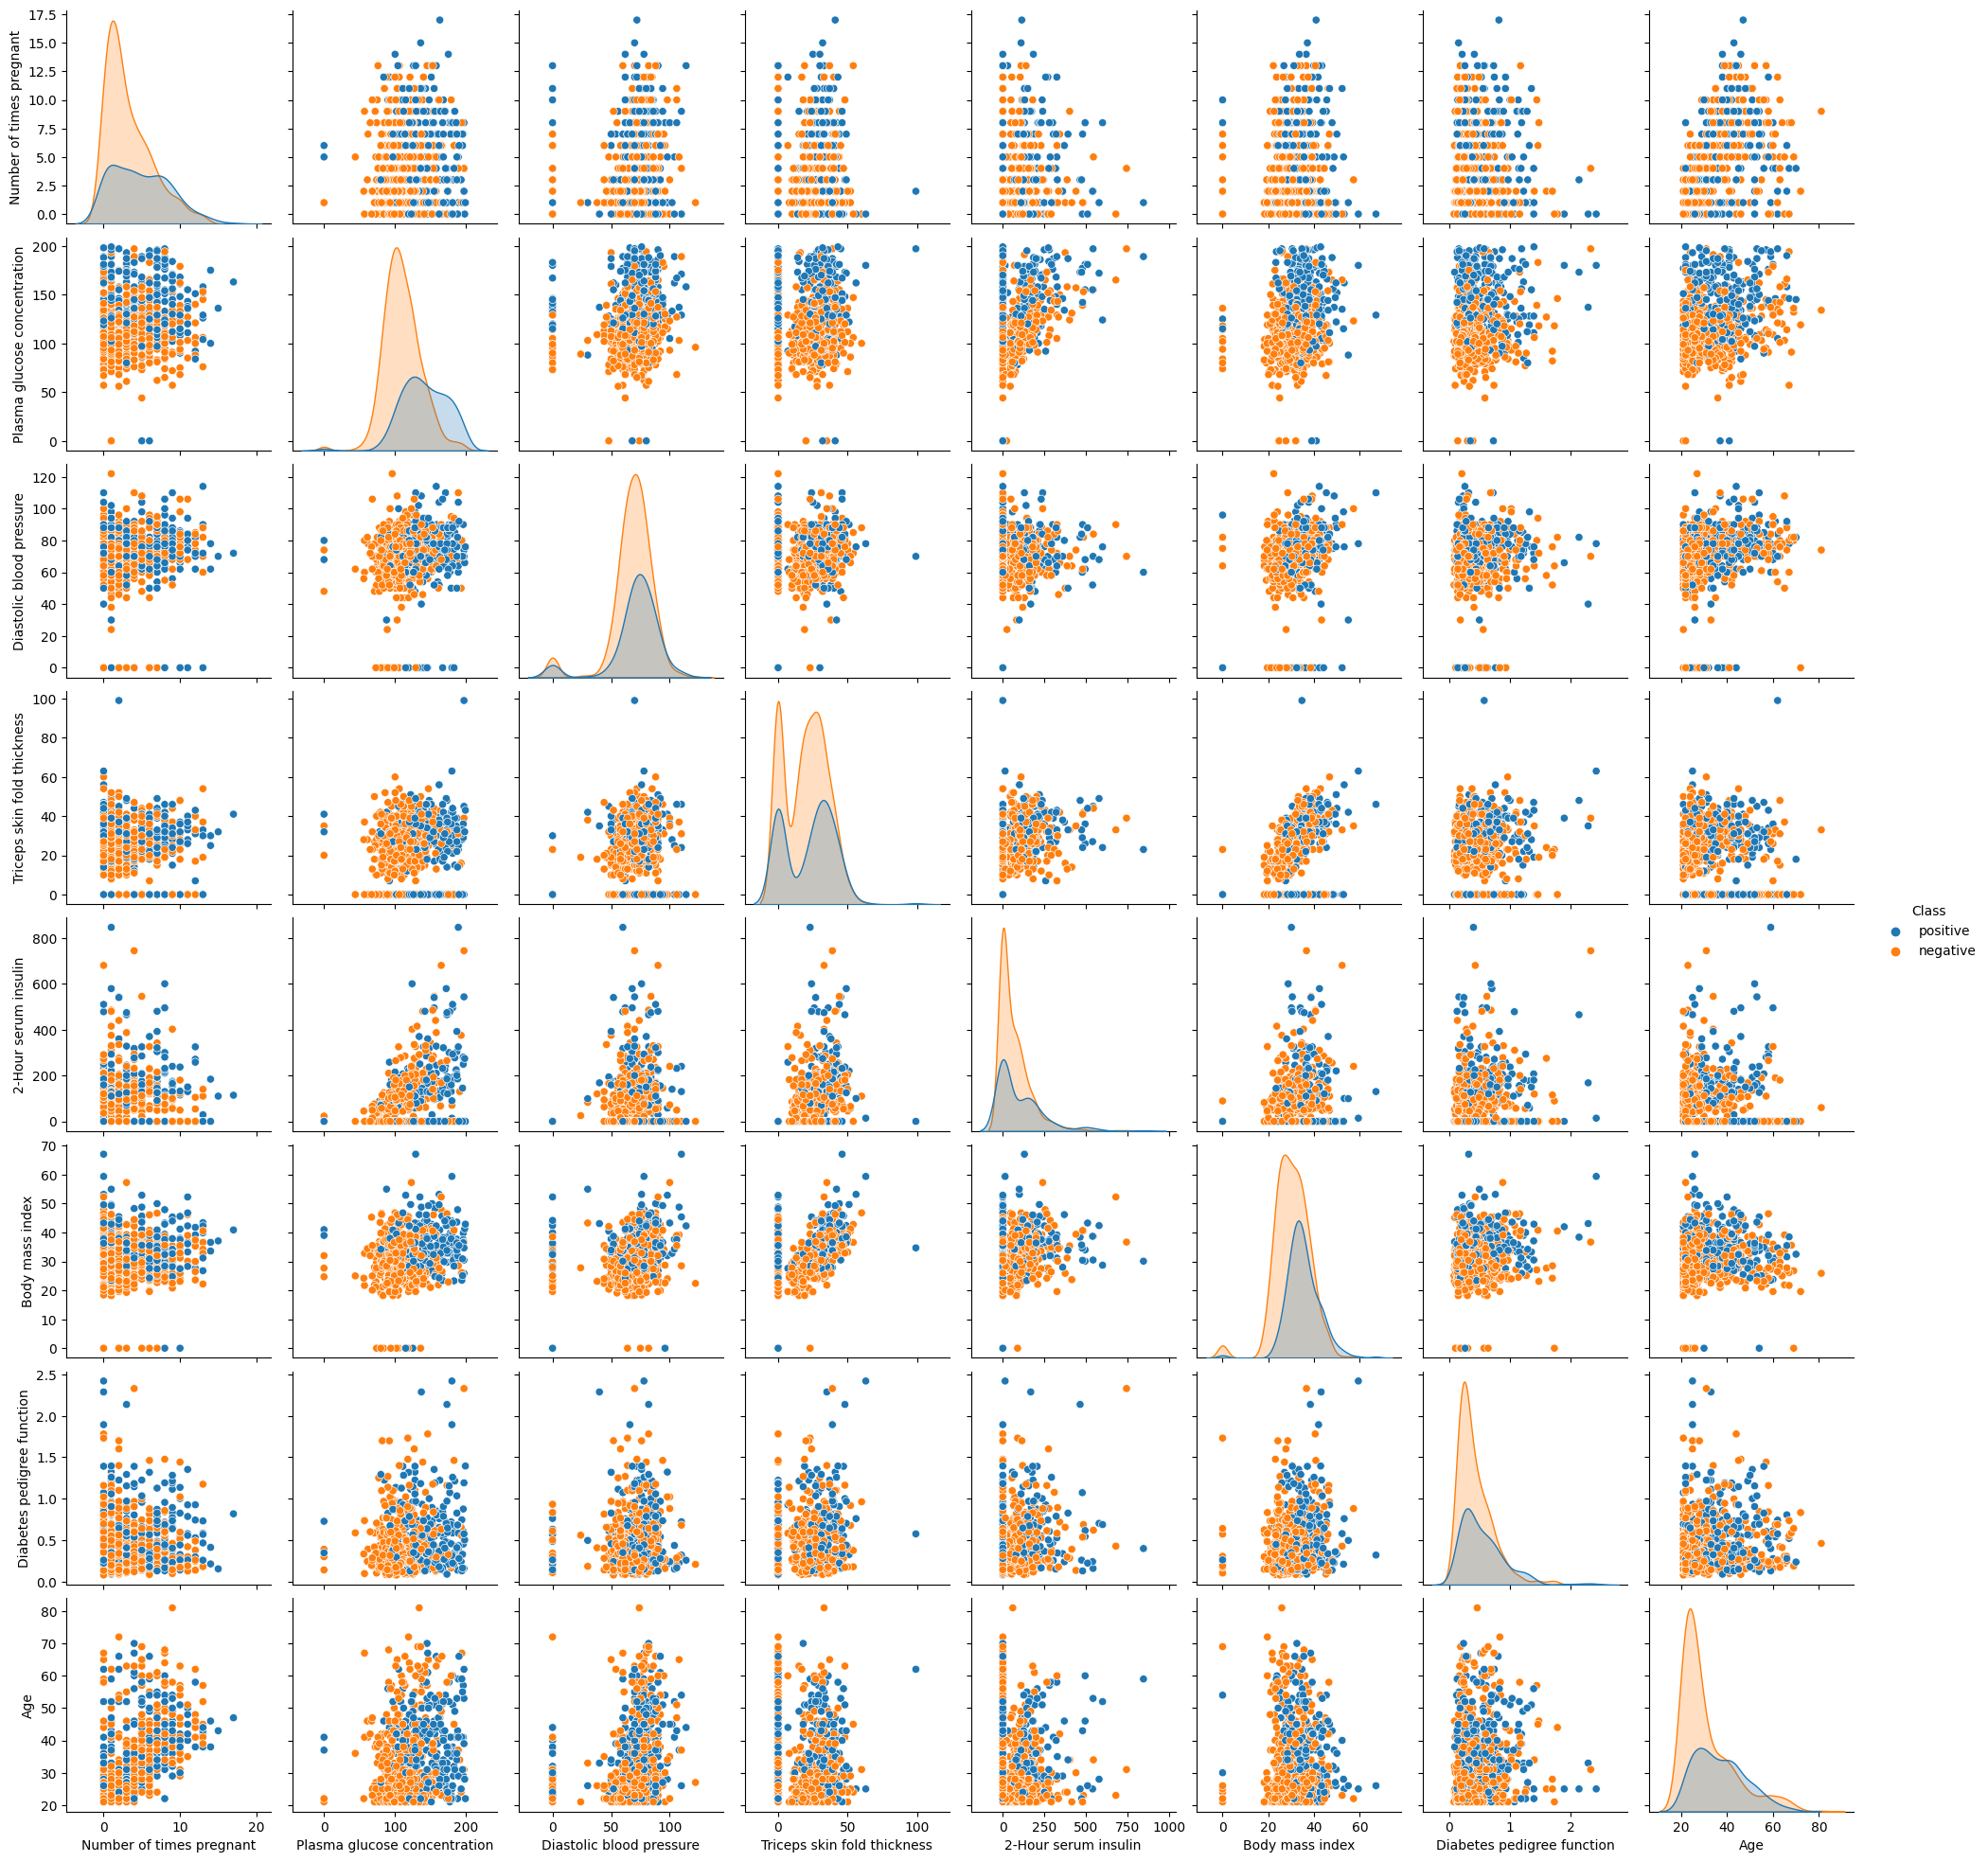

In [6]:
sns.pairplot(df_diabetes, hue="Class")

<Axes: xlabel='Class', ylabel='count'>

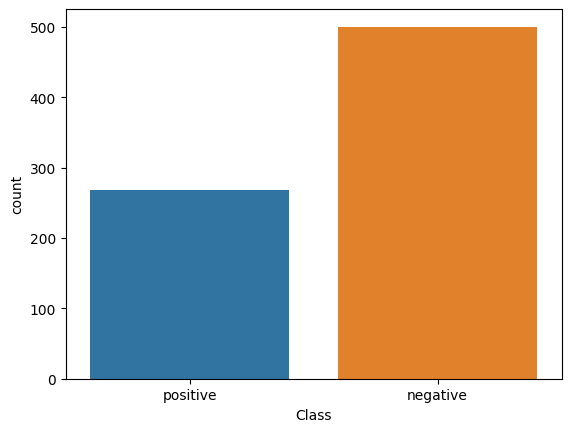

In [7]:
plt.clf()
sns.countplot(x=df_diabetes["Class"])

In [8]:
df_features = df_diabetes[[col for col in df_diabetes.columns if col not in ["Class"]]]
df_labels = df_diabetes["Class"]

X = df_features.to_numpy()
Y, classes = pd.factorize(df_labels)

#normalizacja cech

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

print(f"X_shape={X_norm.shape}\tY_shape={Y.shape}")


X_shape=(768, 8)	Y_shape=(768,)


LogReg	f1=0.837+-0.019
KNN	f1=0.804+-0.027
SVM	f1=0.825+-0.02
DT	f1=0.764+-0.021


<BarContainer object of 4 artists>

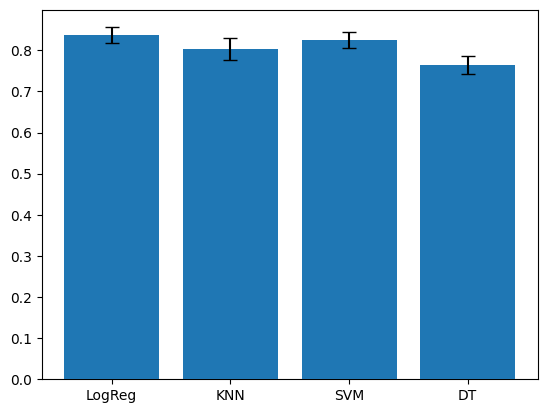

In [9]:
f1_values_mean = []
f1_values_error = []
model_names = []

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

for model_name, model in [
    ("LogReg",LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("DT", DecisionTreeClassifier())]:
        scores = cross_val_score(model, X_norm, Y, cv=cv, scoring="f1")
        error = (scores.std()*1.96/np.sqrt(20))
            
        print(f"{model_name}\tf1={scores.mean().round(3)}+-{error.round(3)}")
        model_names.append(model_name)
        f1_values_mean.append(scores.mean())
        f1_values_error.append(error)
fig, ax = plt.subplots()
ax.bar(model_names,height=f1_values_mean, yerr=f1_values_error, capsize=5, zorder=3)

In [10]:
#Wizualizacja macierzy pomyłek
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=42)

model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)

Y_pred = model_logreg.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[ 50  30]
 [ 31 120]]


[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

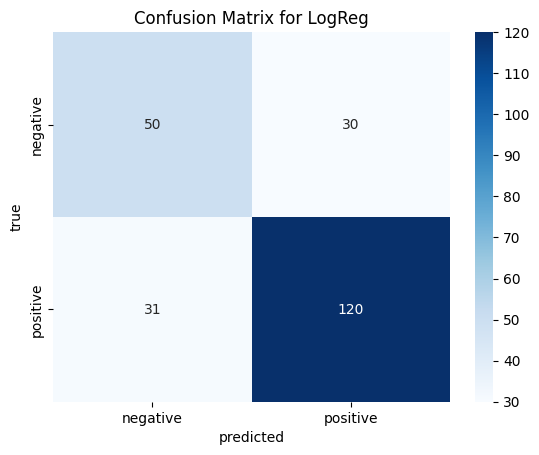

In [11]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.0f')
ax.set_title("Confusion Matrix for LogReg")
ax.set_xlabel("predicted")
ax.set_ylabel("true")
ax.xaxis.set_ticklabels(['negative', 'positive'])
ax.yaxis.set_ticklabels(['negative', 'positive'])

In [12]:
# metryki z sklearn
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Y_test, Y_pred).round(3)}")
print(f"precision={precision_score(Y_test, Y_pred).round(3)}")
print(f"recall={recall_score(Y_test, Y_pred).round(3)}")
print(f"F1={f1_score(Y_test, Y_pred).round(3)}")

(2) metryki ze sklearn
accuracy=0.736
precision=0.8
recall=0.795
F1=0.797


Random Forest dla (5, 3)	f1=0.819+-0.038


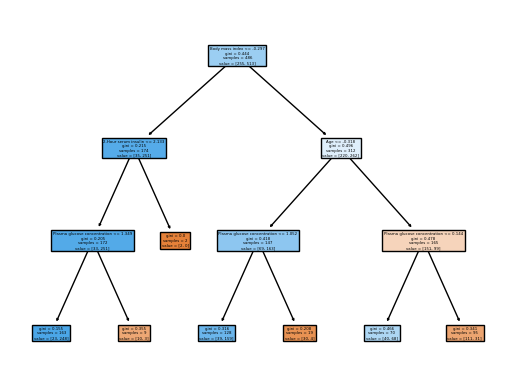

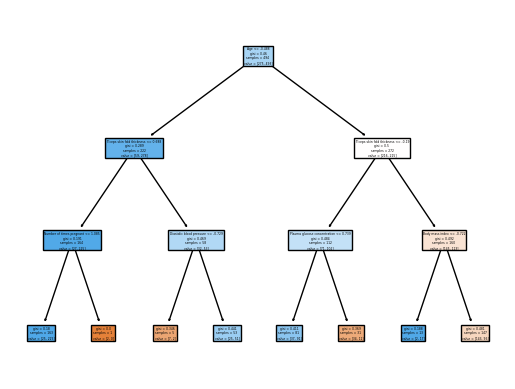

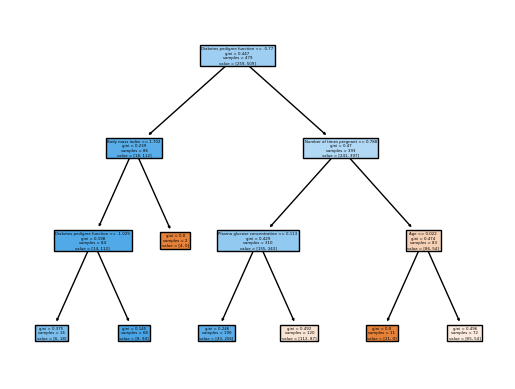

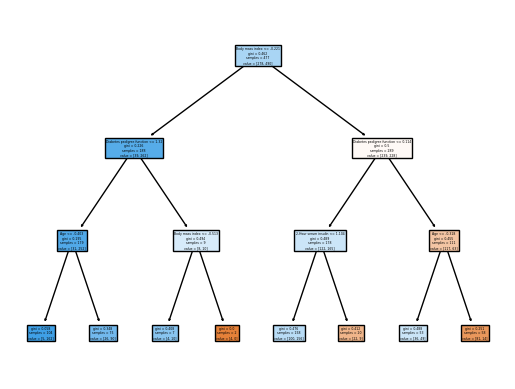

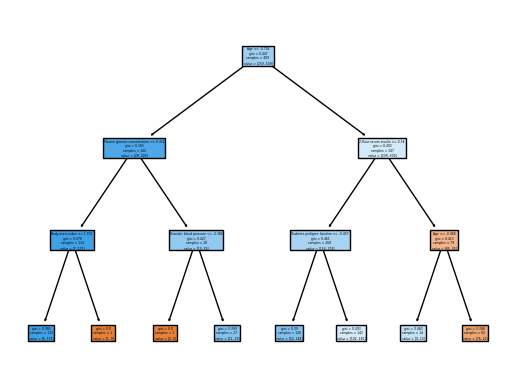

In [13]:
# 6.6. model RandomForest dla klasyfikacji binarnej (chory, zdrowy)

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

model_RF = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
scores = cross_val_score(model_RF, X_norm, Y, scoring="f1", cv=cv)
print(f"Random Forest dla (5, 3)\tf1={scores.mean().round(3)}+-{scores.std().round(3)}")

# Analiza predykcji
model_RF.fit(X_norm, Y)

feature_names = df_diabetes.columns[:8]
# Zapis drzew decyzyjnych
for i, estimator in enumerate(model_RF.estimators_):
  fig, ax = plt.subplots()
  _ = tree.plot_tree(estimator, feature_names=feature_names, filled=True)
  plt.savefig(f"DT_{i}.png", dpi=300)